In [15]:
%%writefile limiters.py

import numpy as np

def smoothness(ql, qi, qr) {
    '''
    Calculate the smoothness parameter
    '''
    
    eps = 1.e-30
    return (qi - ql) / (qr - qi + eps)
}


def minmod(ql, qi, qr):
    '''
    Minmod limiter
    
    ql, qi, qr:    at least one-dimensional array.
    
    '''
    eps = 1.e-30
    r = (qi - ql) / (qr - qi + eps)
    
    return np.minimum(np.maximum(r, 0), 1.)


def superbee(ql, qi, qr):
    '''
    Superbee limiter
    
    ql, qi, qr:    at least one-dimensional array.
    
    '''
    eps = 1.e-30
    r = (qi - ql) / (qr - qi + eps)
    
    return np.maximum(0., np.maximum(np.minimum(2.*r, 1.), np.minimum(r, 2.)))


def van_leer(ql, qi, qr):
    '''
    Van Leer limiter
    
    ql, qi, qr:    at least one-dimensional array.
    
    '''
    eps = 1.e-30
    r = (qi - ql) / (qr - qi + eps)
    
    return (r + np.abs(r)) / (1 + np.abs(r))


def gen_minmod(ql, qi, qr, theta=1.):
    '''
    Minmod limiter
    
    ql, qi, qr:    at least one-dimensional array.
    
    '''
    eps = 1.e-30
    r = (qi - ql) / (qr - qi + eps)
    
    return np.maximum(0, np.minimum(theta * r, (1 + r) / 2., theta))



Overwriting limiters.py


Text(0, 0.5, '$\\mathrm{limiter}(r)$')

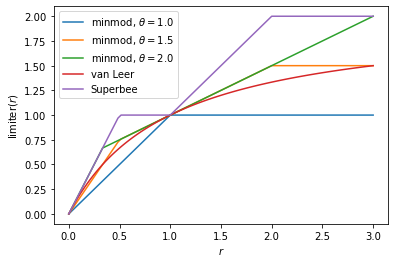

In [25]:
import matplotlib.pyplot as plt
import numpy as np

r = np.linspace(0, 3, 100)
for theta in np.linspace(1., 2., 3):
    plt.plot(r, np.maximum(0., np.minimum(theta * r, np.minimum((1. + r) / 2., theta))), label=fr'minmod, $\theta={theta}$')
plt.plot(r, (r + np.abs(r)) / (1 + np.abs(r)), label='van Leer')
plt.plot(r, np.maximum(0., np.maximum(np.minimum(2.*r, 1.), np.minimum(r, 2.))), label='Superbee')
plt.legend()
plt.xlabel(r'$r$')
plt.ylabel(r'$\mathrm{limiter}(r)$')


